In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import mpld3
mpld3.enable_notebook()

df = pd.read_csv('data.csv', skiprows=5, delimiter=';')

In [2]:
datetime.strptime(df.iloc[0]['Time'], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2019, 8, 24, 2, 0)

In [3]:
# reseting 0 date to 2019/08/24
def to_integer_and_reset(df):
    arr = []
    dt_time0 = datetime.strptime(df.iloc[0]['Time'], '%Y-%m-%d %H:%M:%S').timestamp()
    for i in range (0,len(df)) :
            dt_time = int(datetime.strptime(df.iloc[i]['Time'], '%Y-%m-%d %H:%M:%S').timestamp() - dt_time0)
        #arr.append(1000000*dt_time.year + 10000*dt_time.month + 100*dt_time.day+dt_time.hour  - 2019082400)
        arr.append(dt_time)
    return arr

In [4]:
def regression_results(y_true, y_pred):
    # Regression metrics
    mse = metrics.mean_squared_error(y_true, y_pred) 
    rmse = round(np.sqrt(mse),4)
    return rmse

In [5]:
df['time'] = to_integer_and_reset(df)
df

,Time,PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef],PLR-CAD1-CE2: CAD1-BUT6-CAP(B)_CE2_V2[µdef],PLR-CAD1-CE2: Temp(1)[°C],PLR-CAD1-CE2: Temp(2)[°C],time
0,2019-08-24 02:00:00,125.5984,78.35375,20.019870,19.734160,0
1,2019-08-24 03:00:00,124.9860,77.64469,16.321900,18.721740,3600
2,2019-08-24 04:00:00,124.5489,78.16212,15.911130,18.049040,7200
3,2019-08-24 05:00:00,124.8880,78.12858,16.929320,17.395050,10800
4,2019-08-24 06:00:00,124.7521,78.51186,15.151210,17.265230,14400
...,...,...,...,...,...,...
314,2019-09-06 04:00:00,136.9951,91.06235,10.821140,12.592650,1130400
315,2019-09-06 05:00:00,136.5770,90.97504,9.911804,10.108610,1134000
316,2019-09-06 06:00:00,136.2538,90.61229,9.502075,10.992650,1137600
317,2019-09-06 07:00:00,136.4546,90.23997,7.828369,10.791630,1141200


In [6]:
#profile = ProfileReport(df, title="Pandas Profiling Report")

In [7]:
#profile

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(df[['PLR-CAD1-CE2: Temp(1)[°C]']]
                             , df[['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]']])


In [20]:
reg.coef_

array([[-1.08893827]])

In [21]:
reg.intercept_

array([141.8532159])

In [22]:
## for one variable temperature
arr = []
for i in range (0,len(df)) :
    arr.append(df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'].iloc[i] 
               - df['PLR-CAD1-CE2: Temp(1)[°C]'].iloc[i]*reg.coef_[0][0] - reg.intercept_)
df['udef - temp - intercept'] = arr

arr = []
for i in range (0,len(df)) :
    arr.append(df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'].iloc[i] 
               - df['PLR-CAD1-CE2: Temp(1)[°C]'].iloc[i]*reg.coef_[0][0]) 
df['udef - temp'] = arr


arr = []
for i in range (0,len(df)) :
    arr.append(df['PLR-CAD1-CE2: Temp(1)[°C]'].iloc[i]*reg.coef_[0][0]+reg.intercept_) 
df['regression line'] = arr

In [15]:
## for two variable time and temperature
arr = []
for i in range (0,len(df)) :
    arr.append(df['time'].iloc[i]*reg.coef_[0][0]) 
df['time*coef'] = arr

arr = []
for i in range (0,len(df)) :
    arr.append(df['time'].iloc[i]*reg.coef_[0][0] + reg.intercept_) 
df['time*coef+intercept'] = arr

arr = []
for i in range (0,len(df)) :
    arr.append(df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'].iloc[i] - df['time'].iloc[i]*reg.coef_[0][0]) 
df['udef-time*coef'] = arr

arr = []
for i in range (0,len(df)) :
    arr.append(df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'].iloc[i] - df['PLR-CAD1-CE2: Temp(1)[°C]'].iloc[i]*reg.coef_[0][1]) 
df['udef-Temp*coef'] = arr

arr = []
for i in range (0,len(df)) :
    arr.append(df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'].iloc[i] - df['PLR-CAD1-CE2: Temp(1)[°C]'].iloc[i]*reg.coef_[0][1]-reg.intercept_) 
df['udef-Temp*coef-intercept'] = arr

arr = []
for i in range(0,len(df)) :
     arr.append(df['PLR-CAD1-CE2: Temp(1)[°C]'].iloc[i]*reg.coef_[0][1]+df['time'].iloc[i]*reg.coef_[0][0]+reg.intercept_) 
df['tout'] = arr

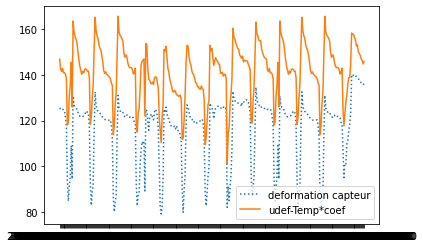

In [18]:

plt.plot(df['Time'], df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'], ':', label='deformation capteur')
#plt.plot(df['Time'], df['time*coef'], '-', label='time*coef')
#plt.plot(df['Time'], df['time*coef+intercept'], '-', label='time*coef+intercept')
#plt.plot(df['Time'], df['udef-time*coef'], '--', label='udef-time*coef')
#plt.plot(df['Time'], df['udef-Temp*coef-intercept'], '.', label='udef-Temp*coef-intercept')
plt.plot(df['Time'], df['udef-Temp*coef'], '-', label='udef-Temp*coef')
#plt.plot(df['Time'], df['tout'], '.', label='tout')
plt.legend(loc='best')
plt.show()

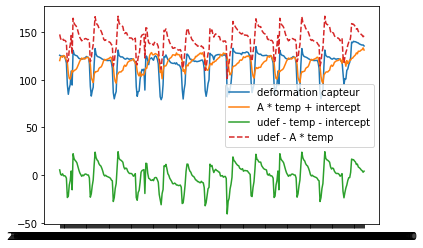

In [23]:
#only temp reg
plt.plot(df['Time'], df['PLR-CAD1-CE2: CAD1-BUT6-CAP(A)_CE2_V1[µdef]'], '-', label='deformation capteur')
plt.plot(df['Time'], df['regression line'], '-', label='A * temp + intercept')
plt.plot(df['Time'], df['udef - temp - intercept'], '-', label='udef - temp - intercept')
plt.plot(df['Time'], df['udef - temp'], '--', label='udef - A * temp')


plt.legend(loc='best')
plt.show()